In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pandas as pd

#MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape (Images):", x_train.shape)
print("Test data shape (Images):", x_test.shape)

Training data shape (Images): (60000, 28, 28)
Test data shape (Images): (10000, 28, 28)


Load the MNIST dataset into NumPy arrays.
Training Data: 60,000 grayscale images (28x28 pixels each).
Test Data: 10,000 test images.

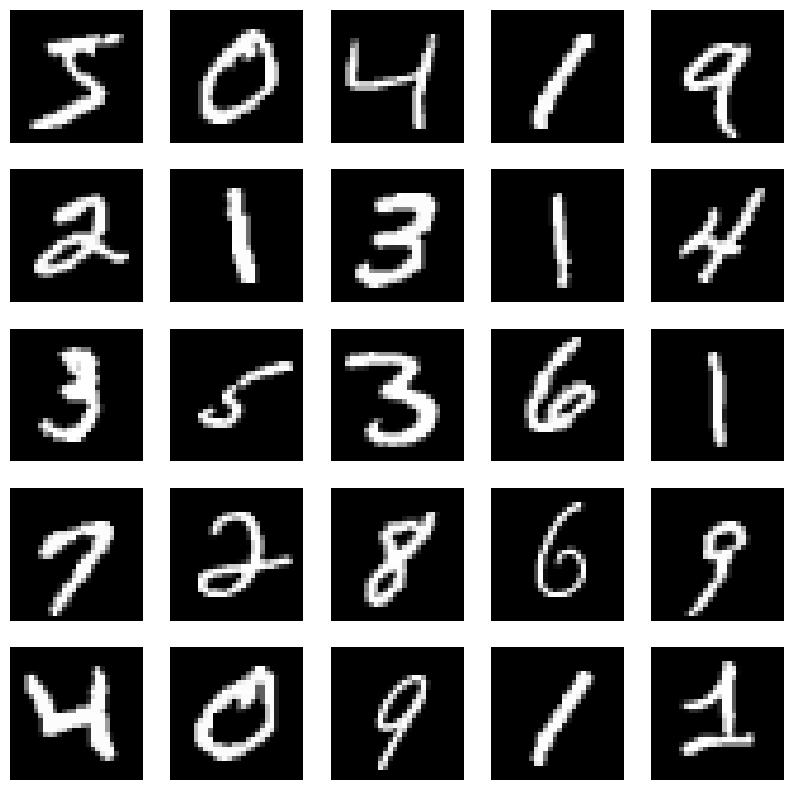

In [50]:
#Sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

View the first 25 images in training dataset.
Each image represents a single handwritten digit between 0-9.

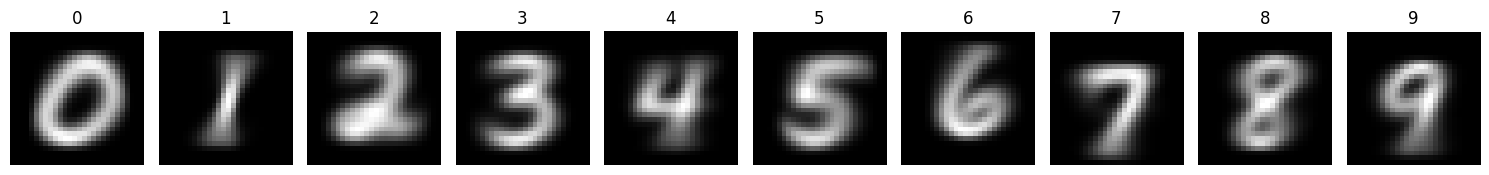

In [58]:
#Avg image
avg_digits = np.zeros((10, 28, 28))
for i in range(10):
    digit_images = x_train[y_train == i]
    avg_digits[i] = np.mean(digit_images, axis=0)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(avg_digits[i], cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.tight_layout()
plt.show()

Calculate the average pixel values for each digit. 

We averaged pixel values across all images for a digit, and this allows us to create a 'typical' representation for each digit - it helps analyse the structure and variability of each digit.

Digits like 0 and 3 show little variation while 8 and 9 seem little complex.

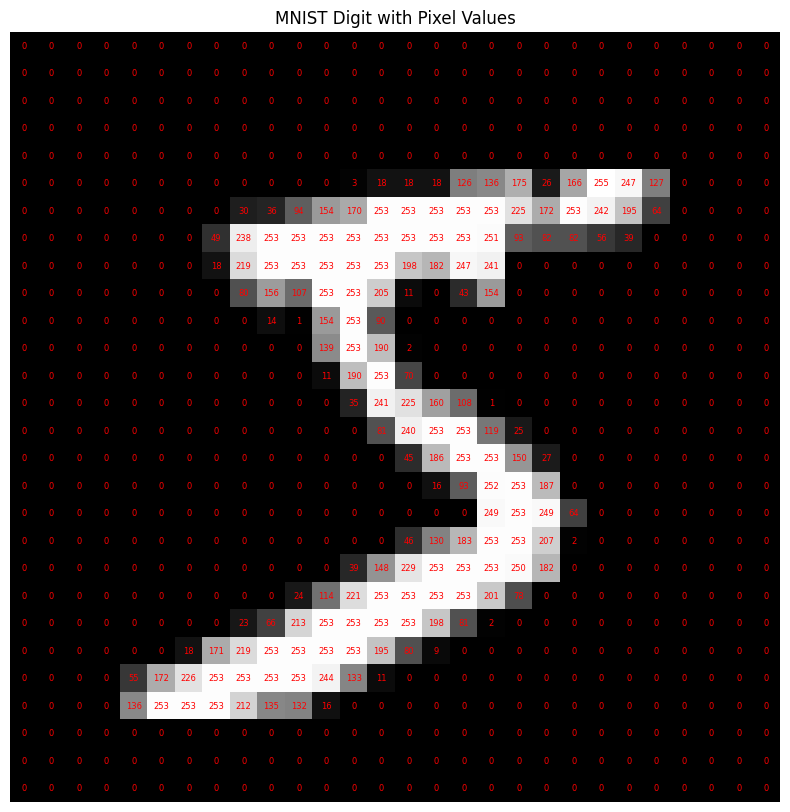

In [55]:
#Pixel values for a sample image
plt.figure(figsize=(12, 10))
plt.imshow(image, cmap='gray', interpolation='nearest')
for i in range(28):
    for j in range(28):
        plt.text(j, i, f'{image[i, j]:d}', 
                 ha='center', va='center', color='red', fontsize=6)
plt.title('MNIST Digit with Pixel Values')
plt.axis('off')
plt.show()

Overlay pixel intensity values on a smaple digit image.

Gives us a numerical view of pixel intensities in a digit, this helps to understand how pixel values range from 0(black) to 255(white) for grayscale images.

Most pixel values are 0 in the background region, higher values are ones where the digit is drawn.


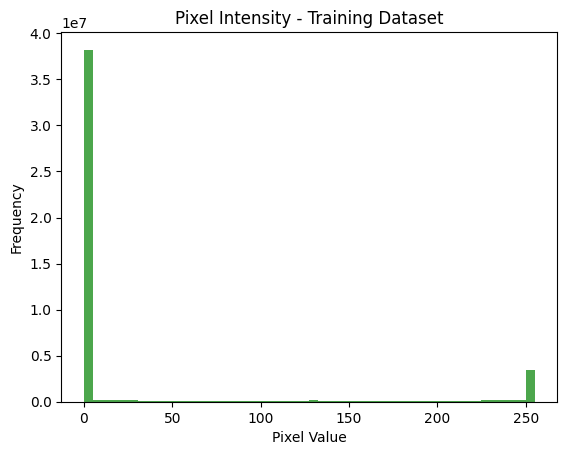

In [54]:
#Pixel Intensity
plt.hist(x_train.ravel(), bins=50, color='green', alpha=0.7)
plt.title("Pixel Intensity - Training Dataset")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


Analyze the distribution of pixel values in the training dataset.

This shows how much of the image data consists of background pixels versus digit pixels, and as expected pixel values close to 0 (background) dominate.

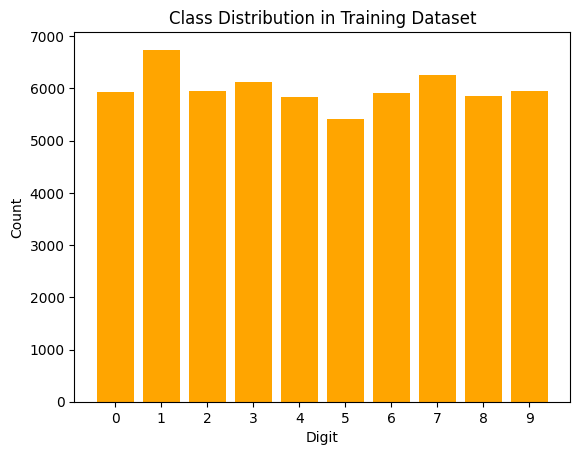

In [46]:
#Digits distribution
classes, counts = np.unique(y_train, return_counts=True)

plt.bar(classes, counts, color="orange")
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(classes)
plt.show()


Plot the frequency of each digit class in the training dataset.

We check here if the dataset is more or less balanced, and as seen from the plot all digits are equally represented.

<Figure size 800x600 with 0 Axes>

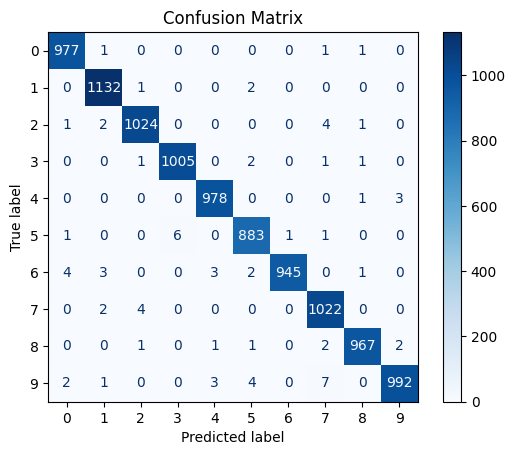

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

file_path = r"C:\Users\allur\OneDrive\Documents\DSTA24_group3\predictions.txt"

predictions = np.loadtxt(file_path, dtype=int)

#Ground truth (true labels)
y_true = y_test  

#Confusion matrix
cm = confusion_matrix(y_true, predictions)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


Compare the ground truth labels and the model predictions using a confusion matrix.

This shows where the model is performing well and where it is making mistakes. Each row represents the true class, and each column represents the predicted class.

The model seems to be working well overall with most predictions being right. The digits 6 and 9 seem to be the most mistaken.